In [90]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [92]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [95]:
df.shape

(303, 14)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x = df.drop(['target'],axis=1)
y = df['target']

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [101]:
x_train

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])

In [102]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [103]:
x_train.shape

(242, 13)

In [104]:
from tensorflow.keras import layers,models

In [105]:
model = models.Sequential()

In [106]:
model.add(layers.Dense(13, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [107]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [108]:
import tensorflow as tf 
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
    verbose=2,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [109]:
model_history = model.fit(x_train,y_train, validation_split=0.30, batch_size=20, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5155 - loss: 0.6934 - val_accuracy: 0.4658 - val_loss: 0.6948
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5433 - loss: 0.6922 - val_accuracy: 0.4932 - val_loss: 0.6944
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5869 - loss: 0.6904 - val_accuracy: 0.5068 - val_loss: 0.6941
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6071 - loss: 0.6889 - val_accuracy: 0.5342 - val_loss: 0.6932
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6262 - loss: 0.6851 - val_accuracy: 0.5479 - val_loss: 0.6912
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.6838 - val_accuracy: 0.5890 - val_loss: 0.6881
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6544 - loss: 0.6807 - val_accuracy: 0.6164 - val_loss: 0.6831
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.6682 - val_accuracy: 0.6027 - val_loss

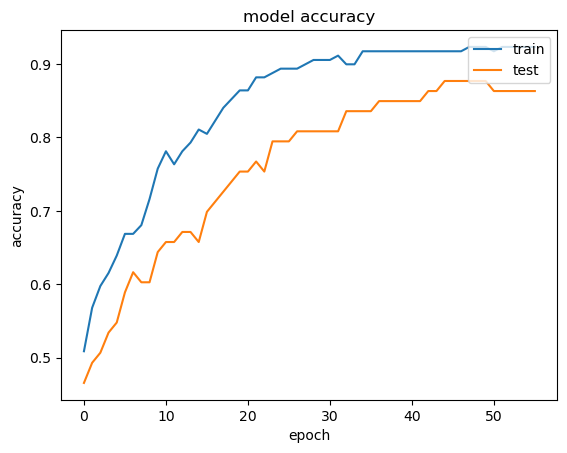

In [110]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train','test'], loc="upper right")
plt.show()

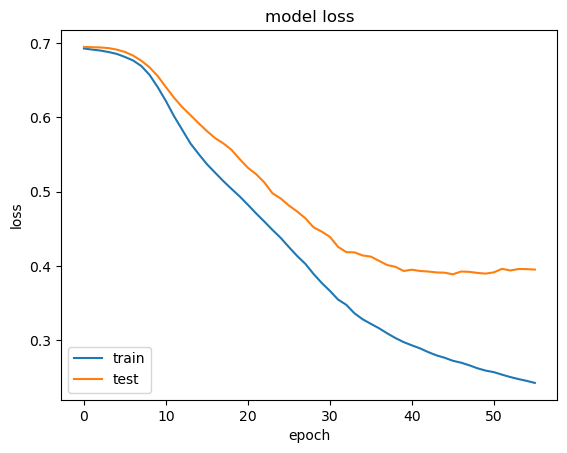

In [111]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train','test'], loc="lower left")
plt.show()

In [112]:
y_pred = model.predict(x_test)
y_pred = (y_pred>=0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [114]:
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[23  4]
 [ 5 29]]


In [115]:
score = accuracy_score(y_test,y_pred)
score

0.8524590163934426